### Task 1


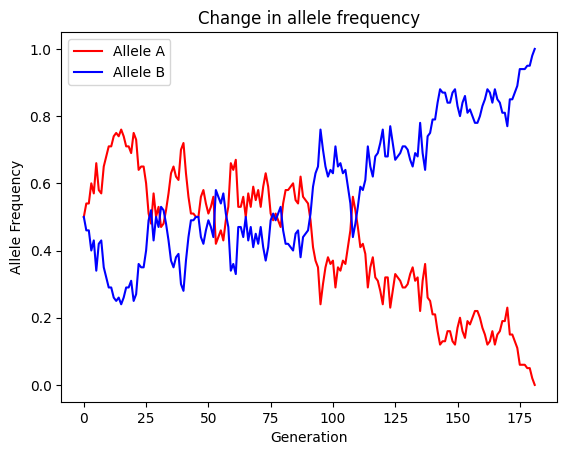

In [16]:
# Task 1

from pylab import *

# Function for evolutionary simulation
def freq_simulation(gen:int, pop:list):

    # Initial gene variant frequencies: 50% 'A', 50% 'B'
    freq_a = [0.5]
    freq_b = [0.5]

    pop_list = pop # initial population
    new_pop = [] # population after sampling

    # Generating random populations
    for i in range(0, gen):
        rand_indices = [randint(1,100) for x in range(0,100)]
        new_pop = [pop_list[x-1] for x in rand_indices]
        freq_a.append(new_pop.count("A")/100)
        freq_b.append(new_pop.count("B")/100)
        pop_list = new_pop
        new_pop = []
        # End simulation after 1,000 generations or if either of the alleles is completely lost from the populations
        if i > gen or freq_a[-1]==1 or freq_a[-1]==0 :
            num_gen = list(range(0,len(freq_a)))
            break

    return [freq_a,freq_b,num_gen]

# Initialising population: 50 'A' and 50 'B' alleles
n = 100 # population size
allele_list = []
for i in range(0,int(n/2)):
    allele_list.append('A')
    allele_list.append('B')


# Running freq_simulation, N = 100, frequencuy = 50
freq_a,freq_b,num_gen = freq_simulation(gen = 1000, pop = allele_list)


# Plotting the change in allele frequency
plot(num_gen, freq_a, 'r', label="Allele A")
plot(num_gen, freq_b, 'b', label="Allele B")
xlabel("Generation")
ylabel("Allele Frequency")
title("Change in allele frequency")
legend(loc = 'upper left')

show()

### Task 2

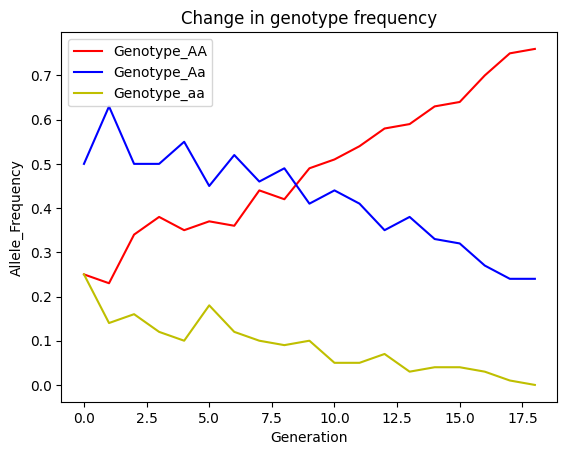

In [6]:
# Task 2


from pylab import *

# Function for evolutionary simulation
def genotype_simulation(gen:int, pop:list):

    pop_list = pop
    # Initial gene variant frequencies: 25% 'AA', 25% 'aa', 25% 'Aa', 25% 'aA'
    new_pop = []
    freq_AA = [.25]
    freq_Aa = [.50]
    freq_aa = [.25]

    for i in range(0, gen):

        allele1 = [pop_list[i][0] for i in range(0,len(pop_list))]
        allele2 = [pop_list[i][1] for i in range(0,len(pop_list))]

        parent1 = [randint(0,100) for x in range(0,len(pop_list))]
        parent2 = [randint(0,100) for x in range(0,len(pop_list))]

        j = 0
        while j <100:
            if parent1[j] == parent2[j]:
                parent1[j] = randint(0,100)
                parent2[j] = randint(0,100)
                next
            if parent1[j]!= parent2[j]:
                child = allele1[parent1[j]] + allele2[parent2[j]]
                if child == "aa":
                    survival=uniform(0,1)
                    # only 80% of 'aa' individuals survive
                    if survival>0.8:
                        parent1[j] = randint(0,100)
                        parent2[j] = randint(0,100)
                        next
                    if survival<0.8:
                        new_pop.append(child)
                        j += 1
                if child!="aa":
                    new_pop.append(child)
                    j += 1

        freq_AA.append(new_pop.count("AA")/100)
        freq_Aa.append(new_pop.count("Aa")/100+new_pop.count("aA")/100)
        freq_aa.append(new_pop.count("aa")/100)
        pop_list = new_pop
        new_pop = []
        if i> gen or freq_aa[-1] == 0:
            num_gen = list(range(0,len(freq_aa)))
            break

    return [freq_AA,freq_Aa,freq_aa,num_gen]

# Initialising population
pop = []
popsize = 100
for i in range(0,int(popsize/4)):
    pop.append("AA")
    pop.append("Aa")
    pop.append("aA")
    pop.append("aa")

# Running genotype_frequency
freq_AA,freq_Aa,freq_aa,num_gen = genotype_simulation(gen=500,pop=pop)


# Plotting the change in allele frequency
plot(num_gen, freq_AA, 'r', label="Genotype_AA")
plot(num_gen, freq_Aa, 'b', label="Genotype_Aa")
plot(num_gen, freq_aa, 'y', label="Genotype_aa")

xlabel("Generation")
ylabel("Allele_Frequency")
title("Change in genotype frequency")
legend(loc='upper left')

show()